# Rainfall Prediction - Weather Forecasting

In [ ]:
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Loading Data

In [ ]:
pf=pd.read_csv(r"C:\Users\MANISHA JUDHA\rainfall.txt")

# Exploring and Visualizing Data 

Exploratory data analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modelling or hypothesis testing task.

In [ ]:
# Shape of the data frame
df.shape

(145460, 23)

The data frame has 23 Attributes with 1,45,460 data points

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
 #Describe Method says the statistics of our data like Maxvalue,Mean,Count..etc for every column
 
df.describe()     

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [ ]:
# Count of Null values across each Column
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

It is clear that Evaporation and Sunshine have very high percentage of missing values.

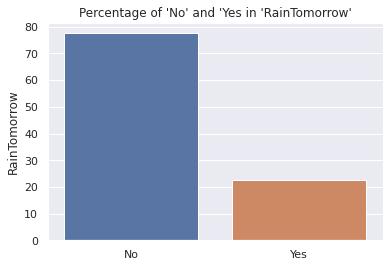

In [ ]:
#Counting the Count of 'NO' and 'YES' from the column RainTomorrow 
RT = df["RainTomorrow"].value_counts(normalize = True)

sns.barplot(x = RT.index, y = RT*100).set_title("Percentage of 'No' and 'Yes in 'RainTomorrow'");

We can see the Class Imbalance from the above plot. It is better to resample the data for better accuracy

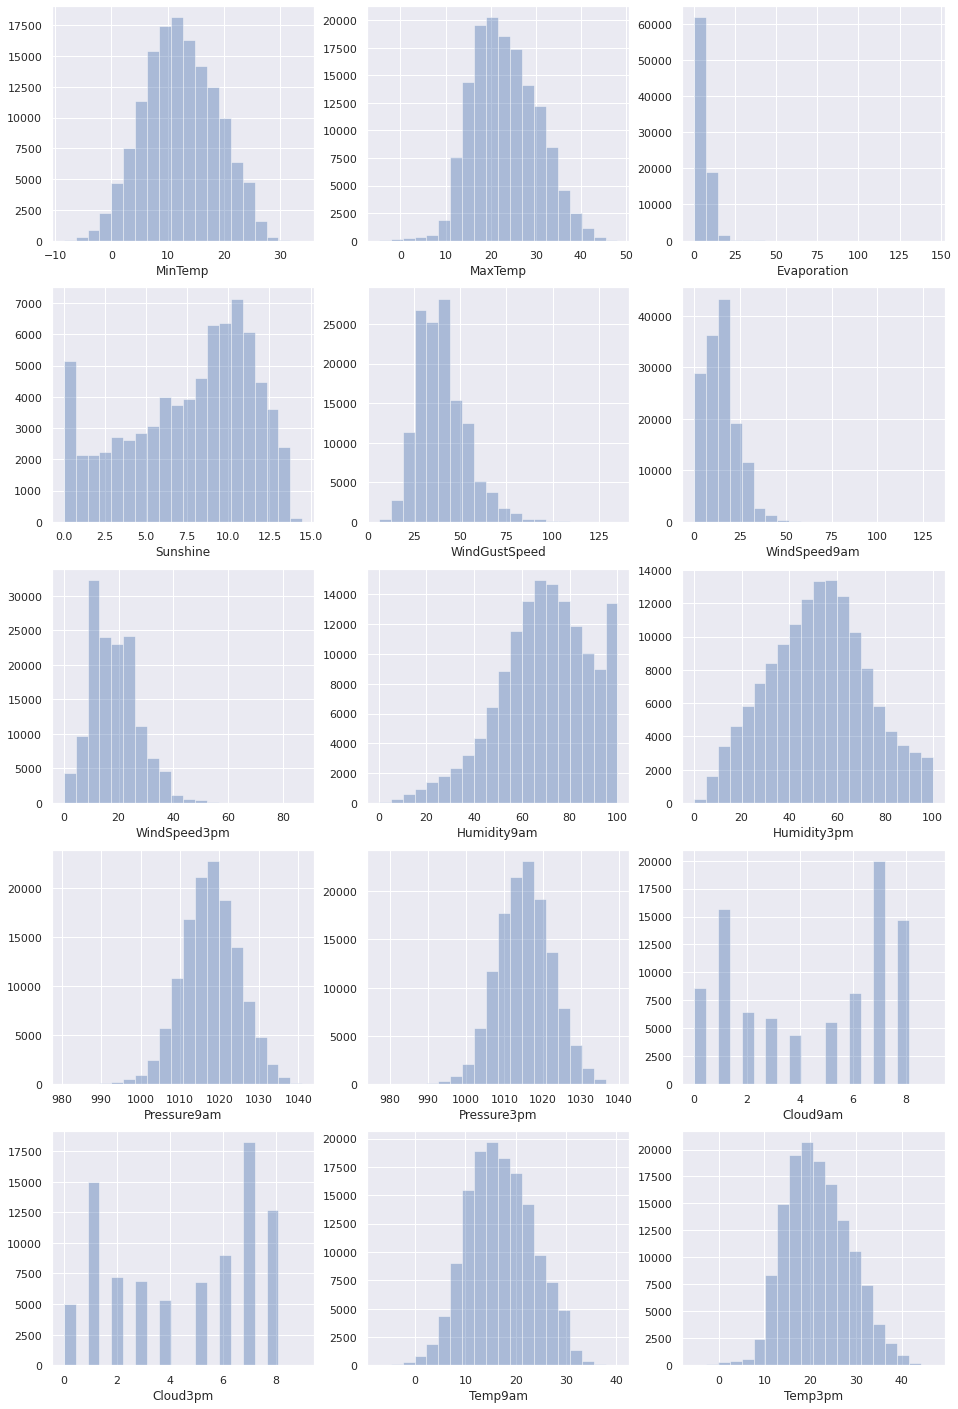

In [ ]:
n_rows=5
n_cols=3
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols);
fig.set_size_inches((16, 25))

#Considering the columns which are useful for evaluation 
dt = df.iloc[:, [2, 3, 5, 6, 8, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]

for i, column in enumerate(dt.columns):
    sns.distplot(df[column],ax=axes[i//n_cols,i%n_cols], kde = False, bins = 20);

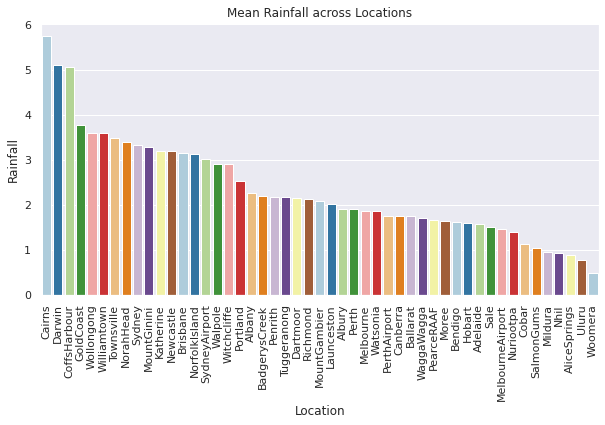

In [ ]:
RF_loc = df.groupby('Location')["Rainfall"].mean().sort_values(ascending = False)

fig = plt.gcf()
fig.set_size_inches((10, 5))
plt.xticks(rotation = 90)
sns.barplot(x = RF_loc.index, y = RF_loc,
            palette = sns.color_palette("Paired")).\
            set_title("Mean Rainfall across Locations");

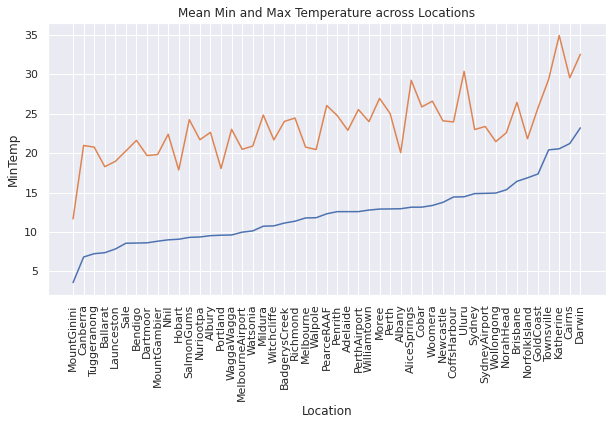

In [ ]:
MinTemp_loc = df.groupby('Location')["MinTemp"].mean().sort_values()
MaxTemp_loc = df.groupby('Location')["MaxTemp"].mean().sort_values()

fig = plt.gcf()
fig.set_size_inches((10, 5))
plt.xticks(rotation = 90)
sns.lineplot(x = MinTemp_loc.index, y = MinTemp_loc);
sns.lineplot(x = MaxTemp_loc.index, y = MaxTemp_loc).\
            set_title("Mean Min and Max Temperature across Locations");

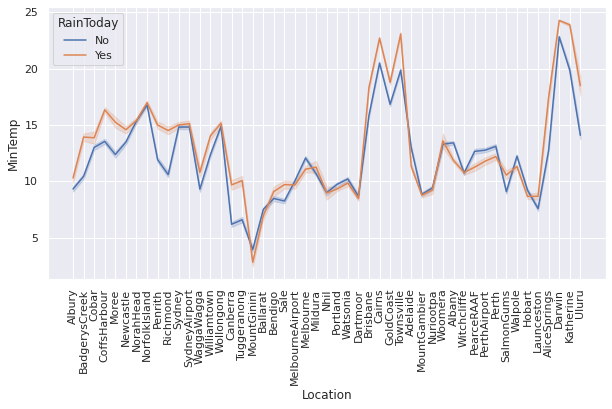

In [ ]:
fig = plt.gcf()
fig.set_size_inches((10, 5))
plt.xticks(rotation = 90)

sns.lineplot(df.Location, df.MinTemp, hue = df.RainToday);

### Lineplot Comparision between MinTemp and Location

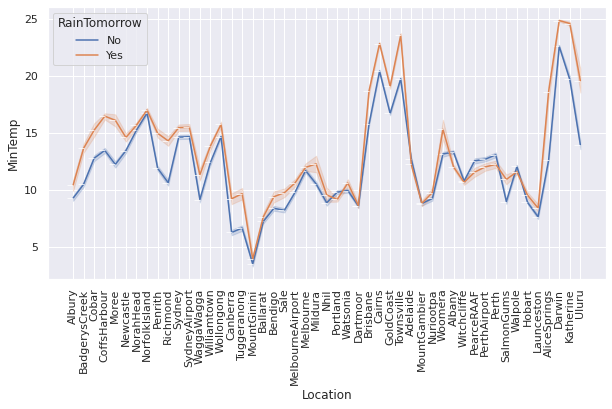

In [ ]:
fig = plt.gcf()
fig.set_size_inches((10, 5))
plt.xticks(rotation = 90)

sns.lineplot(df.Location, df.MinTemp, hue = df.RainTomorrow, marker = False);

### Lineplot Comparision between Location and Humidity3pm

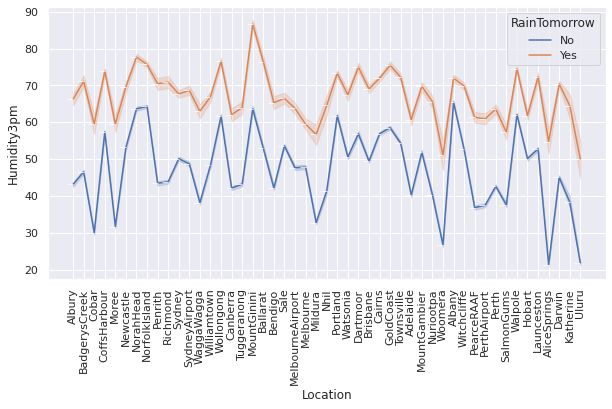

In [ ]:
fig = plt.gcf()
fig.set_size_inches((10, 5))
plt.xticks(rotation = 90)

sns.lineplot(df.Location, df.Humidity3pm, hue = df.RainTomorrow, marker = False);

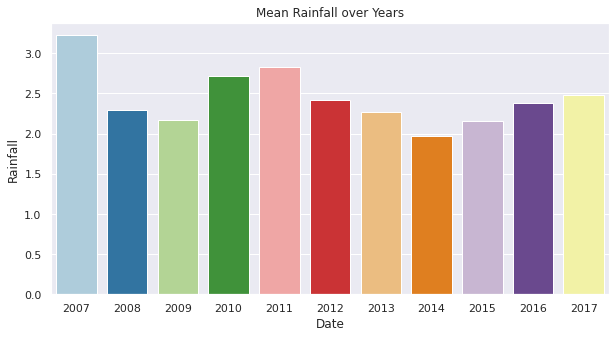

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
RF_year = df.groupby(df['Date'].dt.year)['Rainfall'].mean()

fig = plt.gcf()
fig.set_size_inches((10, 5))

sns.barplot(x = RF_year.index, y = RF_year, 
            palette = sns.color_palette("Paired")).\
            set_title("Mean Rainfall over Years");

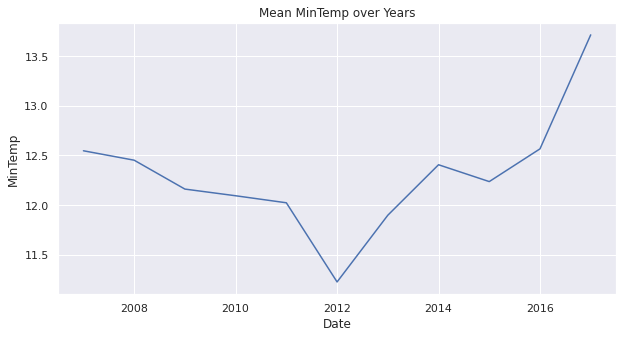

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
MinTemp_year = df.groupby(df['Date'].dt.year)['MinTemp'].mean()

fig = plt.gcf()
fig.set_size_inches((10, 5))

sns.lineplot(x = MinTemp_year.index, y = MinTemp_year,  
            palette = sns.color_palette("Paired")).\
            set_title("Mean MinTemp over Years");

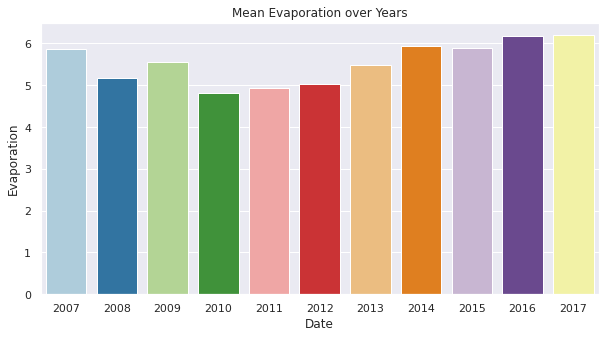

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
Ev_year = df.groupby(df['Date'].dt.year)['Evaporation'].mean()

fig = plt.gcf()
fig.set_size_inches((10, 5))

sns.barplot(x = Ev_year.index, y = Ev_year,
            palette = sns.color_palette("Paired")).\
            set_title("Mean Evaporation over Years");

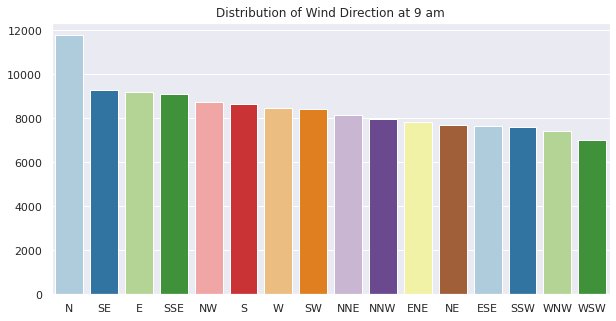

In [ ]:
fig = plt.gcf()
fig.set_size_inches((10, 5));

sns.barplot(x = df['WindDir9am'].value_counts().index,
            y = df['WindDir9am'].value_counts().values,
            palette = sns.color_palette("Paired")).\
            set_title("Distribution of Wind Direction at 9 am");

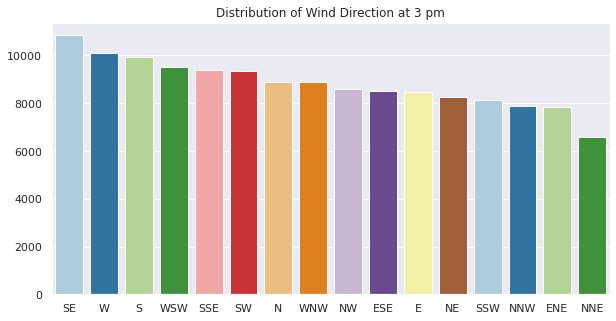

In [ ]:
fig = plt.gcf()
fig.set_size_inches((10, 5));

sns.barplot(x = df['WindDir3pm'].value_counts().index,
            y = df['WindDir3pm'].value_counts().values,
            palette = sns.color_palette("Paired")).\
            set_title("Distribution of Wind Direction at 3 pm");

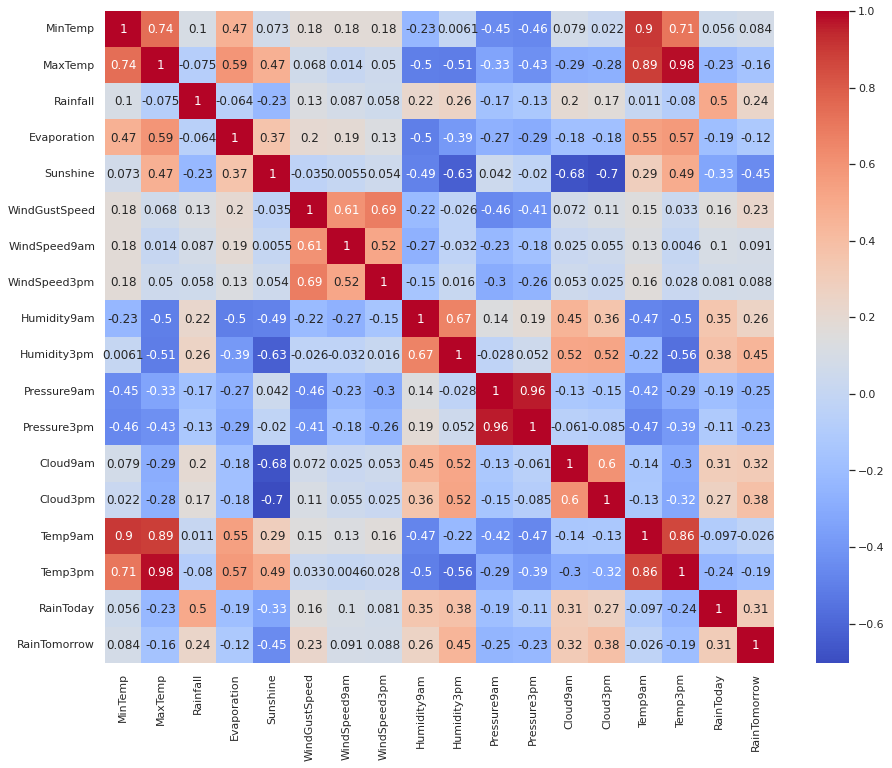

In [ ]:
fig = plt.gcf()
fig.set_size_inches((15, 12));

df['RainToday'].replace({'No': 0, 'Yes': 1}, inplace  = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1}, inplace = True)

sns.heatmap(df.corr(), annot = True, cmap = sns.color_palette("coolwarm", as_cmap = True));

# Cleaning and Preprocessing Data

## Handling Class Imbalance

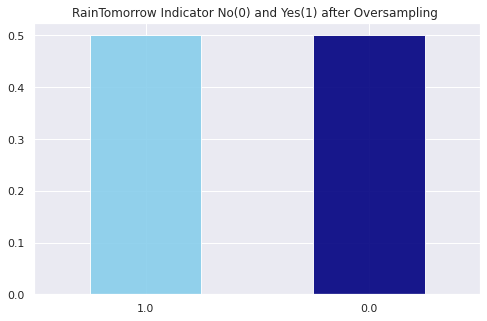

In [ ]:
from sklearn.utils import resample

no = df[df.RainTomorrow == 0]
yes = df[df.RainTomorrow == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
df = pd.concat([no, yes_oversampled])


fig = plt.figure(figsize = (8,5))
df.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling ')
plt.show()

## Feature Selection

In [ ]:
X = df.iloc[:,[1,2,3,4,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]].values
Y = df.iloc[:,-1].values

In [ ]:
print(X)

[['Albury' 13.4 22.9 ... 16.9 21.8 0.0]
 ['Albury' 7.4 25.1 ... 17.2 24.3 0.0]
 ['Albury' 12.9 25.7 ... 21.0 23.2 0.0]
 ...
 ['Cairns' 24.8 31.5 ... 28.7 30.3 0.0]
 ['Ballarat' 4.2 7.9 ... 4.6 6.8 1.0]
 ['Richmond' 19.5 31.6 ... 22.5 31.1 0.0]]


In [ ]:
print(Y)

[0. 0. 0. ... 1. 1. 1.]


In [ ]:
Y=Y.reshape(-1,1)
Y

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

## Dealing with Missing Values

In [ ]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan,strategy='most_frequent') # Fill the missing values with Mode
X = imp.fit_transform(X)
Y = imp.fit_transform(Y)

In [ ]:
X

array([['Albury', 13.4, 22.9, ..., 16.9, 21.8, 0.0],
       ['Albury', 7.4, 25.1, ..., 17.2, 24.3, 0.0],
       ['Albury', 12.9, 25.7, ..., 21.0, 23.2, 0.0],
       ...,
       ['Cairns', 24.8, 31.5, ..., 28.7, 30.3, 0.0],
       ['Ballarat', 4.2, 7.9, ..., 4.6, 6.8, 1.0],
       ['Richmond', 19.5, 31.6, ..., 22.5, 31.1, 0.0]], dtype=object)

In [ ]:
Y

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

## Encoding categorical data

In [ ]:
from sklearn.preprocessing import LabelEncoder

le1=LabelEncoder()
X[:,0] = le1.fit_transform(X[:,0])

le2 = LabelEncoder()
X[:,4] = le2.fit_transform(X[:,4])

le3 = LabelEncoder()
X[:,6] = le3.fit_transform(X[:,6])

le4 = LabelEncoder()
X[:,7] = le4.fit_transform(X[:,7])

le5 = LabelEncoder()
X[:,-1] = le5.fit_transform(X[:,-1])

le6 = LabelEncoder()
Y[:,-1] = le6.fit_transform(Y[:,-1])

In [ ]:
X

array([[2, 13.4, 22.9, ..., 16.9, 21.8, 0],
       [2, 7.4, 25.1, ..., 17.2, 24.3, 0],
       [2, 12.9, 25.7, ..., 21.0, 23.2, 0],
       ...,
       [8, 24.8, 31.5, ..., 28.7, 30.3, 0],
       [5, 4.2, 7.9, ..., 4.6, 6.8, 1],
       [34, 19.5, 31.6, ..., 22.5, 31.1, 0]], dtype=object)

In [ ]:
Y

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
X

array([[-1.5296304 ,  0.13989127,  0.06345497, ...,  0.00998997,
         0.15393456, -0.66291173],
       [-1.5296304 , -0.80100322,  0.37304035, ...,  0.05663083,
         0.51760514, -0.66291173],
       [-1.5296304 ,  0.0614834 ,  0.45747273, ...,  0.64741511,
         0.35759009, -0.66291173],
       ...,
       [-1.10665539,  1.9275908 ,  1.27365237, ...,  1.8445306 ,
         1.39041454, -0.66291173],
       [-1.31814289, -1.30281361, -2.04735446, ..., -1.90228544,
        -2.02808893,  1.50849646],
       [ 0.72623631,  1.09646733,  1.28772444, ...,  0.88061942,
         1.50678913, -0.66291173]])

In [ ]:
Y

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

# Modelling

## Splitting Dataset into Training set and Testing set

### Dividing the Training and Testing Data in 80:20

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
print(X_train)

[[ 0.02127796  1.34737253  1.37215681 ...  1.11382374  0.11029409
  -0.66291173]
 [ 1.50169049 -0.33055597 -0.58385992 ... -0.79845166 -0.74796848
   1.50849646]
 [ 0.37375714  0.72010954  1.97725552 ...  1.19155851  2.10320888
  -0.66291173]
 ...
 [ 0.65574047  0.2496623   0.3167521  ...  1.08272983  0.00846633
  -0.66291173]
 [-1.31814289 -0.58146117 -0.6682923  ... -0.67407603 -0.60250025
  -0.66291173]
 [ 0.02127796  0.17125442 -0.5557158  ... -0.05219785 -0.39884472
   1.50849646]]


In [ ]:
print(Y_train)

[[1.]
 [1.]
 [0.]
 ...
 [1.]
 [0.]
 [1.]]


In [ ]:
Y_test.shape

(44127, 1)

## Models

### Logistic Regression

In [ ]:
#Fitting Logistic Regression to the training set  
from sklearn.linear_model import LogisticRegression  

classifier_lr = LogisticRegression(random_state=0)  
classifier_lr.fit(X_train, Y_train)  

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_lr = classifier_lr.predict(X_test)

In [ ]:
y_pred_lr.shape

(44127,)

In [ ]:
y_pred_lr = y_pred_lr.reshape((44127, 1))

In [ ]:
dt = pd.DataFrame(np.concatenate((Y_test, y_pred_lr), axis = 1), 
                  columns = ["RainTomorrow", "Prediction"])

In [ ]:
dt['RainTomorrow'].replace({0: 'No', 1: 'Yes'}, inplace  = True)
dt['Prediction'].replace({0: 'No', 1: 'Yes'}, inplace  = True)

dt

,RainTomorrow,Prediction
0,No,Yes
1,Yes,Yes
2,No,Yes
3,No,Yes
4,Yes,Yes
...,...,...
44122,No,No
44123,Yes,Yes
44124,No,No
44125,Yes,Yes


In [ ]:
from sklearn.metrics import accuracy_score

accuracy_lr = accuracy_score(Y_test, y_pred_lr)

In [ ]:
print(accuracy_lr)

0.7745824551861672


In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm_lr = confusion_matrix(Y_test, y_pred_lr)

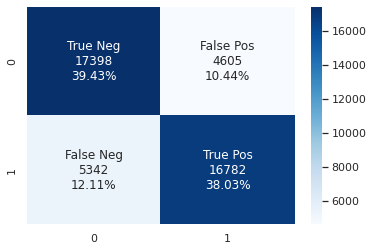

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_lr.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm_lr.flatten()/np.sum(cm_lr)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_lr, annot=labels, fmt="", cmap='Blues');

### Random Forest Classifier

In [ ]:
#Fitting RandomForestClassifier to the model
from sklearn.ensemble import  RandomForestClassifier

classifier_rfs = RandomForestClassifier(n_estimators=100, random_state=0)
classifier_rfs.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pred_rfs = classifier_rfs.predict(X_test)

In [ ]:
y_pred_rfs = y_pred_rfs.reshape((44127, 1))

In [ ]:
dt = pd.DataFrame(np.concatenate((Y_test, y_pred_rfs), axis = 1), 
                  columns = ["RainTomorrow", "Prediction"])

In [ ]:
dt['RainTomorrow'].replace({0: 'No', 1: 'Yes'}, inplace  = True)
dt['Prediction'].replace({0: 'No', 1: 'Yes'}, inplace  = True)

dt

,RainTomorrow,Prediction
0,No,Yes
1,Yes,Yes
2,No,No
3,No,Yes
4,Yes,Yes
...,...,...
44122,No,No
44123,Yes,Yes
44124,No,No
44125,Yes,Yes


In [ ]:
accuracy_rfs = accuracy_score(Y_test, y_pred_rfs)

In [ ]:
accuracy_rfs

0.9471751988578422

In [ ]:
#Creating the Confusion matrix  

from sklearn.metrics import confusion_matrix  
cm_rfs = confusion_matrix(Y_test, y_pred_rfs)  

### Decision Trees

In [ ]:
#Fitting Decision Tree classifier to the training set  
from sklearn.tree import DecisionTreeClassifier  

classifier_dt = DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier_dt.fit(X_train, Y_train)  

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
y_pred_dt = classifier_dt.predict(X_test)

In [ ]:
y_pred_dt = y_pred_dt.reshape((44127, 1))

In [ ]:
dt = pd.DataFrame(np.concatenate((Y_test, y_pred_dt), axis = 1), 
                  columns = ["RainTomorrow", "Prediction"])

In [ ]:
dt['RainTomorrow'].replace({0: 'No', 1: 'Yes'}, inplace  = True)
dt['Prediction'].replace({0: 'No', 1: 'Yes'}, inplace  = True)

dt

,RainTomorrow,Prediction
0,No,No
1,Yes,Yes
2,No,No
3,No,Yes
4,Yes,Yes
...,...,...
44122,No,No
44123,Yes,Yes
44124,No,No
44125,Yes,Yes


In [ ]:
accuracy_dt = accuracy_score(Y_test, y_pred_dt)

In [ ]:
print(accuracy_dt)

0.909307226867904


In [ ]:
from sklearn.metrics import confusion_matrix  
cm_dt = confusion_matrix(Y_test, y_pred_dt)  

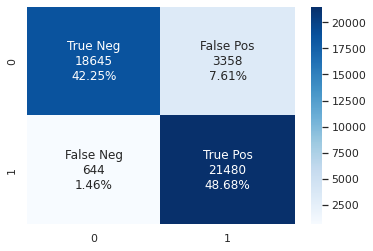

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_dt.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm_dt.flatten()/np.sum(cm_dt)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_dt, annot=labels, fmt="", cmap='Blues')

### Light GBM

In [ ]:
from lightgbm import LGBMClassifier

classifier_lgbm = LGBMClassifier(random_state = 0)
classifier_lgbm.fit(X_train, Y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=0, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
y_pred_lgbm = classifier_lgbm.predict(X_test)

In [ ]:
y_pred_lgbm = y_pred_lgbm.reshape((44127, 1))

In [ ]:
dt = pd.DataFrame(np.concatenate((Y_test, y_pred_lgbm), axis = 1), 
                  columns = ["RainTomorrow", "Prediction"])

In [ ]:
dt['RainTomorrow'].replace({0: 'No', 1: 'Yes'}, inplace  = True)
dt['Prediction'].replace({0: 'No', 1: 'Yes'}, inplace  = True)

dt

,RainTomorrow,Prediction
0,No,Yes
1,Yes,Yes
2,No,Yes
3,No,Yes
4,Yes,Yes
...,...,...
44122,No,No
44123,Yes,Yes
44124,No,No
44125,Yes,Yes


In [ ]:
accuracy_lgbm = accuracy_score(Y_test, y_pred_lgbm)

In [ ]:
print(accuracy_lgbm)

0.8076007886328098


In [ ]:
from sklearn.metrics import confusion_matrix  
cm_lgbm = confusion_matrix(Y_test, y_pred_lgbm)  

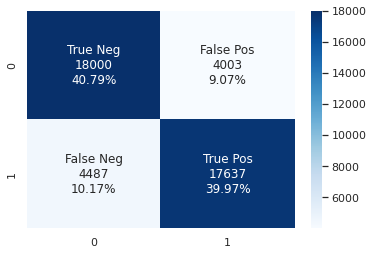

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_lgbm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm_lgbm.flatten()/np.sum(cm_lgbm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_lgbm, annot=labels, fmt="", cmap='Blues');

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

classifier_nb = GaussianNB()
classifier_nb.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred_nb = classifier_nb.predict(X_test)

In [ ]:
y_pred_nb = y_pred_nb.reshape((44127, 1))

In [ ]:
dt = pd.DataFrame(np.concatenate((Y_test, y_pred_nb), axis = 1), 
                  columns = ["RainTomorrow", "Prediction"])

In [ ]:
dt['RainTomorrow'].replace({0: 'No', 1: 'Yes'}, inplace  = True)
dt['Prediction'].replace({0: 'No', 1: 'Yes'}, inplace  = True)

dt

,RainTomorrow,Prediction
0,No,Yes
1,Yes,Yes
2,No,Yes
3,No,Yes
4,Yes,Yes
...,...,...
44122,No,No
44123,Yes,No
44124,No,No
44125,Yes,Yes


In [ ]:
accuracy_nb = accuracy_score(Y_test, y_pred_nb)

In [ ]:
print(accuracy_nb)

0.7405896616583951


In [ ]:
from sklearn.metrics import confusion_matrix  
cm_nb = confusion_matrix(Y_test, y_pred_nb)  

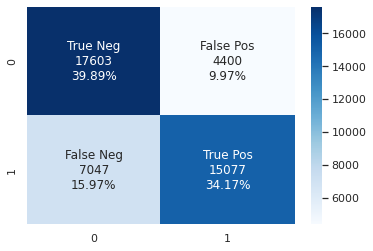

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_nb.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm_nb.flatten()/np.sum(cm_nb)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_nb, annot=labels, fmt="", cmap='Blues');

## Accuracy Comparison

In [ ]:
accuracy_dict = {"Logistic Regression": accuracy_lr,
                 "Random Forest": accuracy_rfs,
                 "Decision Trees": accuracy_dt,
                 "LightGBM": accuracy_lgbm,
                 "Naive Bayes": accuracy_nb}

accuracy_df = pd.DataFrame( pd.Series(accuracy_dict, index = accuracy_dict.keys()), columns = ["Accuracy"])
accuracy_df

,Accuracy
Logistic Regression,0.774582
Random Forest,0.947175
Decision Trees,0.909307
LightGBM,0.807601
Naive Bayes,0.740590


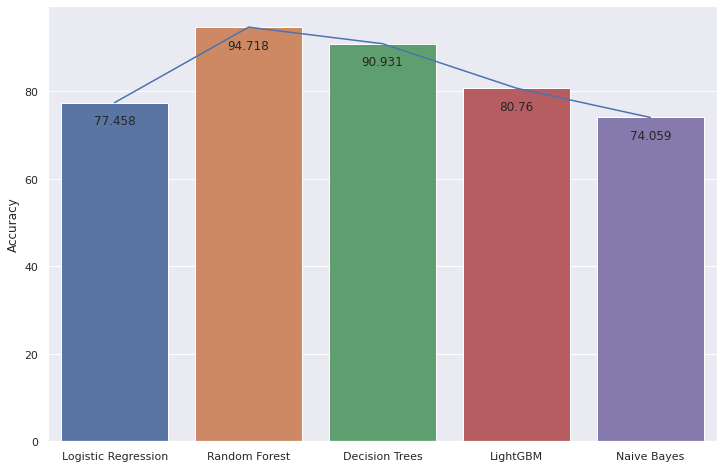

In [ ]:
fig = plt.gcf();
fig.set_size_inches(12, 8);

sns.lineplot(x = accuracy_df.index, y = accuracy_df.Accuracy*100);
sns.barplot(x = accuracy_df.index, y = accuracy_df.Accuracy*100);

for i, val in enumerate(accuracy_df.index):
    y = round(accuracy_df.loc[val].sum()*100, 3)
    plt.text(i, y-5, str(y), ha = "center")